# Using *Cosymlib* to analyze the symmetry properties of molecules

### Pere Alemany <br> *Institut de Química Teòrica i Computacional de la Universitat de Barcelona (IQTCUB)*

                                                                                June 2023
                                                           
This series of tutorials is meant to introduce you to using *Cosymlib*, a python library for calculating continuous shape and symmetry measures (CShMs and CSMs). In each notebook we will show different ways of using the functions in the library. 

If you run the notebook in Google Colab, you must first install the *Cosymlib*: 

In [ ]:
!pip install cosymlib

and download first a few files containing structural data that we have prepared in advance for you: 

In [ ]:
!wget  https://raw.githubusercontent.com/GrupEstructuraElectronicaSimetria/cosymlib/pere_tutorial/docs/tutorials/sqplanar.xyz
!wget  https://raw.githubusercontent.com/GrupEstructuraElectronicaSimetria/cosymlib/pere_tutorial/docs/tutorials/cent_sqplanar.xyz
!wget  https://raw.githubusercontent.com/GrupEstructuraElectronicaSimetria/cosymlib/pere_tutorial/docs/tutorials/crn6.xyz 
!wget  https://raw.githubusercontent.com/GrupEstructuraElectronicaSimetria/cosymlib/pere_tutorial/docs/tutorials/S_coord_9.xyz     
!wget  https://raw.githubusercontent.com/GrupEstructuraElectronicaSimetria/cosymlib/pere_tutorial/docs/tutorials/S_coord_8.xyz  

# Using shape to compute continuous shape measures


`shape` is the script used to calculate continuous shape measures (CShMs) for geometrical objects described as a set of vertices. In this case, we don't compare a given structure with its images obtained after applying a geometrical transformation (proper or improper rotations), but with a reference shape, that is, an ideal polyhedron. In shape we distinguish between centered and non centered polyhedra, depending on if we have a central atom or not in our structure. You can use shape to calculate CShM measures with respect to predefined shapes just by indicating a label, for instance T-4 for the tetrahedron, or with respect to a custom reference structure. In the latter case you must provide a file with the coordinates of your reference structure. 

Let's start calculating CShMs for some simple cases to see the most relevant features of the `shape`command. To start, let's take a look at the `sqplanar.xyz`and `cent_sqplanar` files:

In [ ]:
!cat sqplanar.xyz
!cat cent_sqplanar.xyz

As you can see, we have a simple H4 square in the first one and a centered CH4 square, with a C atom in the center, in the second one. 
Let's start with the `sqplanar.xyz`structure. To calculate shape measures we will have to use the `shape -m LAB` command with a label for the reference structure that we want to use in our calculations. If we don't know the labels for the structures that are available for our case we may use the `-l` tag to get this information. You can find the complete list of predefined structures with their corresponding labels in the documentation for the cosymlib (https://cosymlib.readthedocs.io/en/latest/usage.html#shape-references).

In [ ]:
!shape sqplanar.xyz -l

To compute a given CShM we should use the `-m LAB` tag in `shape`, for instance to calculate the CShM for the square as the reference:

In [ ]:
!shape sqplanar.xyz -m SP-4 

The result, S(SP-4) = 0.000 just tells us, as expected, that the shape of our square is indeed a square. If we compute the measures for the other reference shapes P we will get CShM values 0 < S(P) < 100. The larger the value of S(P) the more different is our problem structure from the reference shape. 

In [ ]:
!shape sqplanar.xyz -m T-4
!shape sqplanar.xyz -mvTBPY-4

The calculations indicate that the square is quit far away from the tetrahedron, S(Td) = 33.333, but the axially vacant trigonal bipyramid is a little bit more far away, S(vTBPY-4).

Let's try now to compute the square planar CShM for the centered structure in `cent_sqplanar.xyz`:

In [ ]:
!shape cent_sqplanar.xyz -m SP-4

As you see, we get an error. If you concentrate only on the last line of the message you read: *Exception: Reference and input structures have different number of atoms* meaning that we are compare our CH4 structure with 5 atoms with a reference polyhedron, the tertahedron, which is has only 4 atoms. If we look at the reference structures available for the `cent_sqplanar.xyz`file using the `-l` tag you will see that the tetrahedron is not an option, we get only reference structures with 5 vertices:

In [ ]:
!shape cent_sqplanar.xyz -l

If we want to compute shape measures for a centered tetrahedron we need to indicate that we have a central atom and give also its position (the first atom in our example) using the `-c 1`tag. Adding this to our last command we will get the available structures for centered polyhedra with 5 vertices, one central vertex + 4 additional ones, and here we see that we have the T-4 option: 

In [ ]:
!shape cent_sqplanar.xyz -c 1 -l

To get the T-4 CShM for the centered tetrahedron we just type: 

In [ ]:
!shape cent_sqplanar.xyz -c 1 -m T-4

Be aware that it is crucial to identify the central atom properly. If we consider that the central atom is in position 2 we get a totally different (in this case nonsense) result:

In [ ]:
!shape cent_sqplanar.xyz -c 2 -m T-4

As a special option, you can use the `-m` tag in combination with `all` instead of a particular shape reference label to calculate the CShMs with respect to all reference shapes compatible with the provided structure. This feature is especially useful if you want to know which is the closest reference shape for your problem structure.

In [ ]:
!shape cent_sqplanar.xyz -c 1 -m all

This calculation tells us that our structure has the shape of a square planar ML4 compound, S(SP-4) = 0.0 and that the next closer reference shape is the see-saw structure, with S(SS-4) = 19.05, a quite large value. Small distortions give values of S(P) < 1.0, moderate distortions give values 1.0 < S(P) < 5.0. Larger S(P) values indicate that your shape is very different from the reference one.

We have seen that `shape` uses a set of standard labels to describe the reference shapes included in the incorporated shape library. Some shapes such as T-4 are well known, but other
polyhedra, specially in the case when the number of vertices n is larger than 6 are not so familiar and we would like to have the coordinates of the reference shape to inspect it with a visualizer. 

Let's do a new example and show how to make shape write extra information. The `S_coord_8.xyz` file contains the coordination environement for 8-coordinated Eu atoms extracted from two complexes. Let's look at the file to find where the central Eu atom is located.

In [ ]:
!cat  S_coord_8.xyz

Let us see first which polyhedra are compatible with our centered ML8 structure

In [ ]:
!shape S_coord_8.xyz -c 1 -l

We see that there is a quite large list of polyhedra, some of them such as the Johnson gyrobifastigium J26 (JGBF-8) which are quite unusual. We can call `shape`with the `--references_n 8`tag to write an .xyz file with the coordinates of all reference shapes with 8 vertices which can be lateter visualized using an external program. In our case, since we have a centered structure, if we want to include the position of the central atom in the reference shape we must add it afterwards, locating it at the coordinate origin.

In [ ]:
!shape --references_n 8

Shape informs us that it has cerated a new `L8_refs.xyz` file in our folder. We can use again the `!cat` command to see the content of this file:

In [ ]:
!cat L8_refs.xyz

Let us use now shape to see which of these reference shapes fits best our problem structures using the `-m all`tag: 

In [ ]:
!shape S_coord_8.xyz -c 1 -m all

The calculation shows that in this case the best description for the coordination polyhedron is a cube, CU-8, with a S(CU-8) measure between 4. and 5. for the two compounds. These numbers indicate that the cube has an important distortion. To analyze it we can make shape write the coordinates of the cube that best matches our structure using the `-s` tag and the `-o filename` tag to redirect the output to a file. Since we have redirected the output to the file, we will not get any result when executing the command and we will have to use the `cat` command afterwards to see the results 

In [11]:
!shape S_coord_8.xyz -c 1 -m CU-8 -s -o S_coord_8.out

In [ ]:
!cat S_coord_8.out

The file contains now 4 structures (be careful, it's not a .xyz file and you cannot visualize it directly with a usual program to visualize molecular structures). If you do this for the first structure you will get a picture of the distortion. We see that while the four oxygen atoms move towards the central Eu atom, the four nitrogen atoms move outwards, so that the final polyhedron is more or less a right prism with two rhombic bases. The Eu atom is kept at the central position in the distortion. 
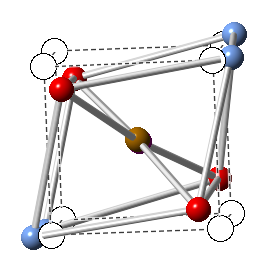

# Shape maps


The *Cosymlib* library contains a stand-alone script to compute CShMs for two different reference shapes and plot the results in a shape map. The script computes also the position of a problem structure along the minimum deviation path and the value of the path deviation function. For this purpose we must call the `shape_map` command giving two reference shape labels with the tags `-m_1` and `-m_2`. The labels after `-m_1` and `-m_2` will indicate the CShMs used the x- and the y-axes of the map, respectively.

The following calls build an octahedral/trigonal prismatic shape map for the set of ML<sub>6</sub> structures contained in the `crn6.xyz` file. Let's first have a look at the data to see where we have the central atom:

In [ ]:
!cat crn6.xyz

Since the Cr atom is in the first position we must call `shape` with the `-c 1`tag. We want to compute the octahedral and trigonal prismatic CShMs. To get the labels we use first `shape` with the `-c 1`and the `-l` tags.

In [ ]:
!shape crn6.xyz -c 1 -l 

Now we can run `shape` with the `-m OC-6` and the `-m TPR-6` tags to get the desired CShMs:

In [ ]:
!shape crn6.xyz -m OC-6 -c 1
!shape crn6.xyz -m TPR-6 -c 1

We can build the shape map directly using the `shape_map` command indicating the two reference shape labels with the `-m_1` and `-m_2` tags :

In [ ]:
!shape_map crn6.xyz -c 1 -m_1 OC-6 -m_2 TPR-6 

We can use also the `shape_map` command to plot directly the shape map with the `-o image` tag. This will generate a `shape_map.png` file which we can visualize afterwards: 

In [ ]:
!shape_map crn6.xyz -m_1 OC-6 -m_2 TPR-6 -c 1 -o image

from IPython.display import Image
Image(filename='shape_map.png')

The continuous line appearing in the plot corresponds to the minimal distortion path between the two structures. 

# A practical example using CShMs and CSMs


`shape` Let's do now a practical example of using shape to decide which is the polyhedron that best describes the coordination environment of an atom in a real case. In the `S_coord_9.xyz` file we provide you with the structures of the coordinatton environement for of an europium atom in eight different complexes. Use this information to find which ideal polyhedron is the best description of the coordination environment in each compound and how far is the real geometry from the ideal one in each case. These compounds have their main application as luminiscent materials due to the sharp emission lines originating from f-f transitions on the lanthanide ion. Since f-f transitions are symmetry forbidden in centrosymmetric environements, it's interesting to work with compounds where the coordination environment of Eu is far from having Ci symmetry, a feature that we can check by computing the S(Ci) measure. 

Remember that you will have to:
* look at the geometries to see in which position do we have the central atom (Eu)
* call `shape` with the `-l` tag to see which polyhedra are compatible with our structures
* call `shape`with the `-m all`tag to calculate all possible CShMs
* find out which one is the smallest in each case
* plot a shape map for the two reference structures with the smallest CShMs values
* call the `gsym` command with the `-m Ci` tag to calculate the S(Ci) measure and check that, indeed, the compounds are far from being centrosymmetric.